In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('/content/expenses.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
data.tail()

,age,sex,bmi,children,smoker,region,charges,agebins,sex_bin,smoker_bin
1333,50,male,30.97,3,no,northwest,10600.5483,45-55,0,1
1334,18,female,31.92,0,no,northeast,2205.9808,17-25,1,1
1335,18,female,36.85,0,no,southeast,1629.8335,17-25,1,1
1336,21,female,25.80,0,no,southwest,2007.9450,17-25,1,1
1337,61,female,29.07,0,yes,northwest,29141.3603,55-64,1,0


In [3]:
data.shape

(1338, 7)

In [ ]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
agebins     0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


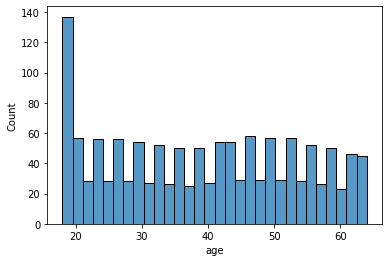

In [37]:
# Age Distribution
sns.histplot(data.age, bins = 30)
plt.show()

In [28]:
# creating bins for age
ranges = [17,25,35,45,55,64]
labels = ['17-25', '25-35', '35-45', '45-55', '55-64']
data['agebins'] = pd.cut(data.age, ranges, labels = labels, ordered = True)
data.head()

,age,sex,bmi,children,smoker,region,charges,agebins,sex_bin,smoker_bin
0,19,female,27.900,0,yes,southwest,16884.92400,17-25,1,0
1,18,male,33.770,1,no,southeast,1725.55230,17-25,0,1
2,28,male,33.000,3,no,southeast,4449.46200,25-35,0,1
3,33,male,22.705,0,no,northwest,21984.47061,25-35,0,1
4,32,male,28.880,0,no,northwest,3866.85520,25-35,0,1


In [53]:
# number of entries in each age bin
data.agebins.value_counts()

17-25    306
45-55    284
25-35    268
35-45    264
55-64    216
Name: agebins, dtype: int64

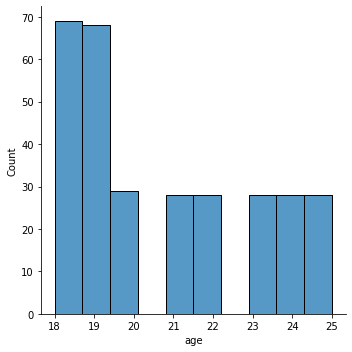

In [34]:
# age bin plot
sns.displot(data[data.agebins == '17-25'].age)
plt.show()

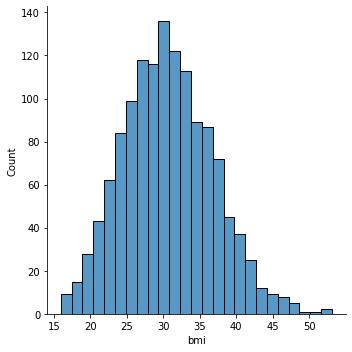

In [36]:
# bmi distribution
sns.displot(data.bmi)
plt.show()

In [ ]:
# bmi categories
df = data.copy(deep=True)

In [ ]:
bmi_cat = []
for i in data.bmi:
    if i<=18.5:
        bmi_cat.append("Underweight")
    elif (i> 18.5 and i<=25):
        bmi_cat.append("Normal weight")
    elif (i>25 and i<30):
        bmi_cat.append("Overweight")
    else:
        bmi_cat.append("Obesity")
df["BMI_Category"]=bmi_cat
df.sample(10)

,age,sex,bmi,children,smoker,region,charges,agebins,sex_bin,smoker_bin,BMI_Category
378,64,female,30.115,3,no,northwest,16455.70785,55-64,1,1,Obesity
16,52,female,30.780,1,no,northeast,10797.33620,45-55,1,1,Obesity
970,50,female,28.160,3,no,southeast,10702.64240,45-55,1,1,Overweight
413,25,male,23.900,5,no,southwest,5080.09600,17-25,0,1,Normal weight
466,60,female,28.700,1,no,southwest,13224.69300,55-64,1,1,Overweight
38,35,male,36.670,1,yes,northeast,39774.27630,25-35,0,0,Obesity
23,34,female,31.920,1,yes,northeast,37701.87680,25-35,1,0,Obesity
327,45,male,36.480,2,yes,northwest,42760.50220,35-45,0,0,Obesity
1217,29,male,37.290,2,no,southeast,4058.11610,25-35,0,1,Obesity
611,38,female,34.800,2,no,southwest,6571.54400,35-45,1,1,Obesity


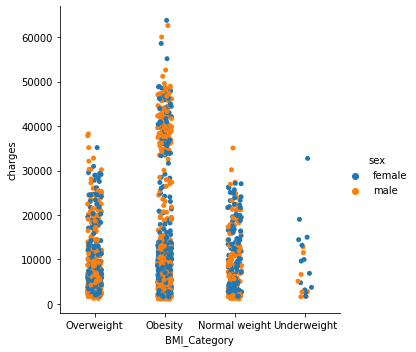

In [ ]:
sns.catplot(x="BMI_Category", y="charges", hue="sex",
             data=df)

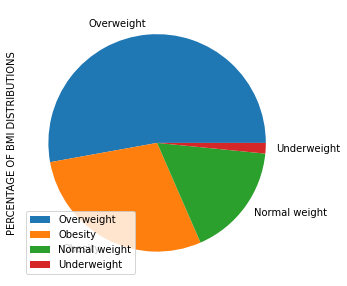

In [ ]:
dat = pd.DataFrame({'PERCENTAGE OF BMI DISTRIBUTIONS': df.BMI_Category.value_counts().tolist()},
                  index=['Overweight', 'Obesity', 'Normal weight', 'Underweight'])
plot = dat.plot.pie(y='PERCENTAGE OF BMI DISTRIBUTIONS', figsize=(5, 5))

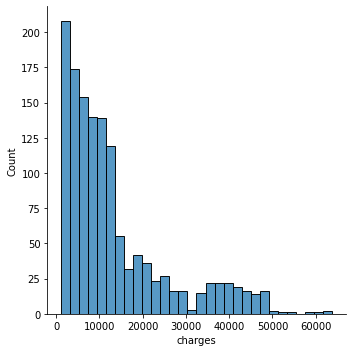

In [55]:
# charges distribution
sns.displot(data.charges)
plt.show()

In [39]:
# creating bins for males and females
data['sex_bin'] = data.apply(lambda row:0 if row['sex'] == 'male' else 1, axis = 1)
data.head()

,age,sex,bmi,children,smoker,region,charges,agebins,sex_bin,smoker_bin
0,19,female,27.900,0,yes,southwest,16884.92400,17-25,1,0
1,18,male,33.770,1,no,southeast,1725.55230,17-25,0,1
2,28,male,33.000,3,no,southeast,4449.46200,25-35,0,1
3,33,male,22.705,0,no,northwest,21984.47061,25-35,0,1
4,32,male,28.880,0,no,northwest,3866.85520,25-35,0,1


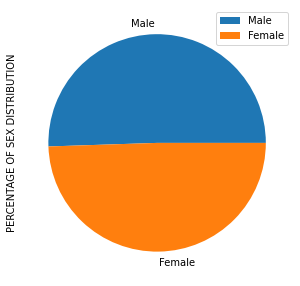

In [ ]:
dat = pd.DataFrame({'PERCENTAGE OF SEX DISTRIBUTION': data.sex.value_counts().tolist()},
                  index=['Male','Female'])
plot = dat.plot.pie(y='PERCENTAGE OF SEX DISTRIBUTION', figsize=(5, 5))

In [40]:
# creating smoker and non smoker bins
data['smoker_bin'] = data.apply(lambda row:0 if row['smoker'] == 'yes' else 1, axis = 1)
data.head()

,age,sex,bmi,children,smoker,region,charges,agebins,sex_bin,smoker_bin
0,19,female,27.900,0,yes,southwest,16884.92400,17-25,1,0
1,18,male,33.770,1,no,southeast,1725.55230,17-25,0,1
2,28,male,33.000,3,no,southeast,4449.46200,25-35,0,1
3,33,male,22.705,0,no,northwest,21984.47061,25-35,0,1
4,32,male,28.880,0,no,northwest,3866.85520,25-35,0,1


In [41]:
data_reg = data[['age', 'bmi', 'children', 'charges', 'sex_bin', 'smoker_bin']]
data_reg.head()

,age,bmi,children,charges,sex_bin,smoker_bin
0,19,27.900,0,16884.92400,1,0
1,18,33.770,1,1725.55230,0,1
2,28,33.000,3,4449.46200,0,1
3,33,22.705,0,21984.47061,0,1
4,32,28.880,0,3866.85520,0,1


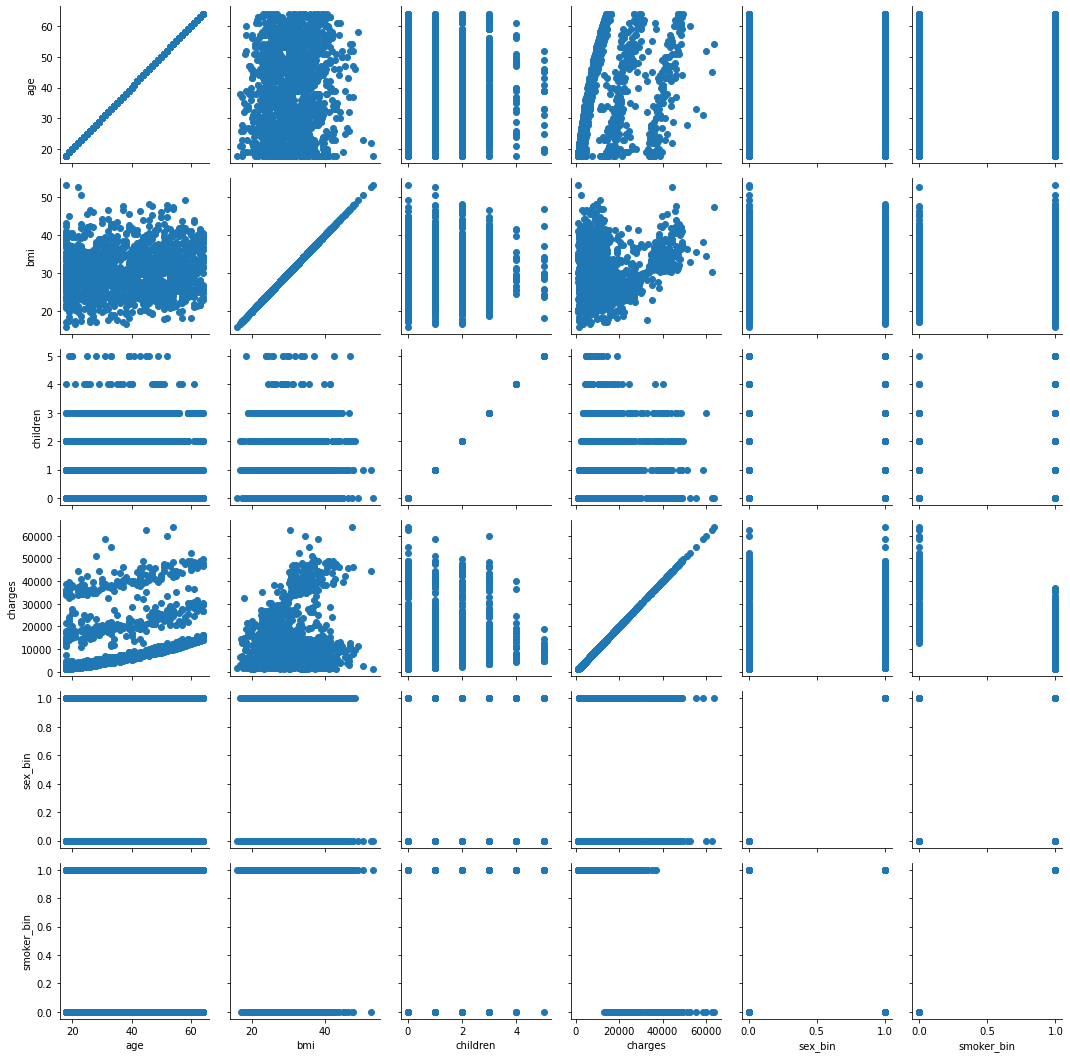

In [42]:
pair_grid_plot = sns.PairGrid(data_reg)
pair_grid_plot.map(plt.scatter)